In [7]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 4000
import re

# Question 1

In [28]:
def answer_one():
    
    # --- DataFrame - Energy ---
    # Step 1: Import
    Energy = pd.read_excel('/Users/jonathansuarezcaceres/Downloads/1_Data Science/Intro to DS with Python/Course1_Resources/assignments/assignment3/assets/Energy Indicators.xls',
                    usecols = 'C:F', skiprows = 17, nrows=227, na_values = '...')
    
    # Step 2: Columns rename
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
    # Step 3: Units conversion
    Energy['Energy Supply'] = Energy['Energy Supply'] * 1000000
    
    # Middle step: Index update to country
    Energy = Energy.set_index('Country')
    
    # Step 4: Country renaming
    Energy = Energy.rename(index = {'Republic of Korea' : 'South Korea',
                        'United States of America20' : 'United States',
                        'United Kingdom of Great Britain and Northern Ireland19' : 'United Kingdom',
                        'China, Hong Kong Special Administrative Region3' : 'Hong Kong',
                        'Iran (Islamic Republic of)' : 'Iran'})
    
    # Step 5: Country column cleaning
    index = pd.DataFrame(Energy.index)
    new_index = index.replace(to_replace = '[\d]+$', value = '', regex = True)
    Energy.index = new_index['Country']
    
    
    # --- DataFrame - GDP ---
    # Step 1: Import
    GDP = pd.read_csv('Course1_Resources/assignments/assignment3/assets/world_bank.csv',
                 skiprows = 4)
    
    # Middle step: Index update to country
    GDP.set_index('Country Name', inplace = True)
    
    # Step 2: Country renaming
    GDP.rename({'Korea, Rep.' : 'South Korea', 'Iran, Islamic Rep.' : 'Iran',
           'Hong Kong SAR, China' : 'Hong Kong'}, inplace = True)
    
    
    # --- DataFrame - ScimEn ---
    # Step 1: Import
    ScimEn = pd.read_excel('Course1_Resources/assignments/assignment3/assets/scimagojr-3.xlsx')
    
    # Middle step: Index update to country
    ScimEn.set_index('Country', inplace = True)
    
    # --- Merging ---
    # We will first merge ScimEn and GDP
    
    # Step 1: Filtering the top 15 universities
    ScimEn_top = ScimEn[ScimEn['Rank'] < 16]
    
    # Step 2: Filtering the years of interest (2006 - 2015)
    years_of_interest = [str(x) for x in list(range(2006, 2016))]
    GDP_2006_2015 = GDP[years_of_interest]
    
    # Step 3: Now we merge both
    first_merger = pd.merge(ScimEn_top, Energy, how = 'left',
                            left_index = True, right_index = True)
    
    # Step 4: Now we proceed with merging the resulting dataframe with Energy
    final_df = pd.merge(first_merger, GDP_2006_2015, how = 'left', left_index = True,
                       right_index = True)
    
    # Step 5: We set the index to Rank
    #final_df = final_df.reset_index()
    #final_df.set_index('Country', inplace = True)
    
    return final_df
    
    raise NotImplementedError()

In [29]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


# Question 2

In [50]:
def answer_two():
    
    ScimEn = pd.read_excel('Course1_Resources/assignments/assignment3/assets/scimagojr-3.xlsx')
    
    # Calculation of lost entries
    lost_entries = len(ScimEn) - len(answer_one())
    
    return lost_entries
    
    raise NotImplementedError()

In [51]:
answer_two()

176

In [17]:
Energy = pd.read_excel('/Users/jonathansuarezcaceres/Downloads/1_Data Science/Intro to DS with Python/Course1_Resources/assignments/assignment3/assets/Energy Indicators.xls',
                    usecols = 'C:F', skiprows = 17, nrows=227, na_values = '...')

GDP = pd.read_csv('Course1_Resources/assignments/assignment3/assets/world_bank.csv',
                 skiprows = 4)
ScimEn = pd.read_excel('Course1_Resources/assignments/assignment3/assets/scimagojr-3.xlsx')
len(Energy) - len(GDP)

numpy.int64

# Question 3

In [39]:
def answer_three():
    # Step 1: Import
    df = answer_one()
    
    #Step 2: We remove the columns we won't use
    columns = df.columns[-10:]
    df = df[columns]
    
    # Step 3: We create the new column for the average
    df['avgGDP'] = df.apply(lambda x: np.nanmean(x), axis = 1)
    
    # Step 4: We sort the list by our new column
    df = df.sort_values(by = 'avgGDP', ascending = False) 
    TopGDP = df['avgGDP']
    
    return TopGDP
    
    raise NotImplementedError()

In [42]:
answer_three()

pandas.core.series.Series

# Question 4

In [52]:
def answer_four():
    # Step 1: Import
    df = answer_one()
    
    #Step 2: We remove the columns we won't use
    columns = df.columns[-10:]
    df = df[columns]
    
    # Step 3: We create the new column for the average
    df['avgGDP'] = df.apply(lambda x: np.nanmean(x), axis = 1)
    
    # Step 4: We sort the list by our new column
    df = df.sort_values(by = 'avgGDP', ascending = False) 
    change6th = df.iloc[5]['2015'] - df.iloc[5]['2006']
    
    return change6th

    raise NotImplementedError()

In [53]:
answer_four()

246702696075.3999

# Question 5

In [54]:
def answer_five():
    df = answer_one()
    
    avgEnergyPerCapita = np.nanmean(df['Energy Supply per Capita'])
    
    return avgEnergyPerCapita
    
    raise NotImplementedError()

In [56]:
answer_five()

157.6

# Question 6

In [105]:
def answer_six():
    df = answer_one()
    
    top = df[df['% Renewable'] == np.max(df['% Renewable'])]
    
    top.reset_index(inplace = True)
    result = (top['Country'][0], top['% Renewable'][0])
    return result
    
    raise NotImplementedError()

In [106]:
answer_six()

('Brazil', 69.64803)

# Question 7

In [127]:
def answer_seven():
    
    # Step 1: import 
    df = answer_one()

    # Step 2: % of renewable calculation
    df['% Self-citations'] = df['Self-citations'] / df['Citations']
    df = df['% Self-citations']

    df = df.sort_values(ascending = False)
    result = (df.index[0], df[0])
    result
    
    return result

    raise NotImplementedError()

In [128]:
answer_seven()

('China', 0.6893126179389422)

# Question 8

In [129]:
def answer_eight():
    # Step 1: Import
    df = answer_one()
    
    # Step 2: Pop calculation
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    # Step 3: Sorting by pop value
    df = df.sort_values(by = 'Population', ascending = False)
    
    # Step 4: Pulling top country
    BiggestPopCountry = df.iloc[0].name
    
    return BiggestPopCountry
    
    raise NotImplementedError()

In [130]:
answer_eight()

'China'

# Question 9

In [135]:
def answer_nine():
    
    # Step 1: Import of data
    df = answer_one()
    
    # Step 2: Calculation of 'Citable documents per Capita'
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    df['Citable documents per Capita'] = df['Citable documents'] / df['Population']
    
    # Step 3: We keep only the columns of interest for the correlation and calculate it
    df = df[['Citable documents per Capita', 'Energy Supply per Capita']]
    correlation_table = df.corr(method = 'pearson')
    
    correlation = correlation_table.iloc[0][1]
    
    return correlation
    
    raise NotImplementedError()

In [136]:
answer_nine()

0.7940010435442943

In [137]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

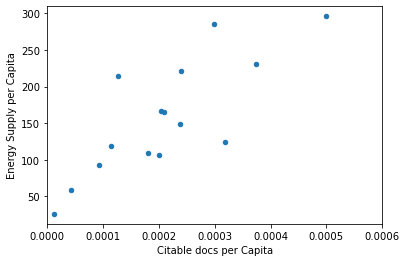

In [138]:
plot9()

# Question 10

In [154]:
def answer_ten():
    # Step 1: Import statistics module
    import statistics as st

    # Step 2: We call the answer_one() method and save it in a new variable
    df = answer_one()
    
    # Step 3: We create a boolean mask and replace the 'Trues' with ones
    df['AboveMedian'] = df['% Renewable'] >= st.median(df['% Renewable']) 
    df = df.replace(True, 1)
    
    # Step 4: We return the series
    HighRenew = df['AboveMedian']
    
    return HighRenew
    
    raise NotImplementedError()

In [155]:
answer_ten()

Country
China                 1.0
United States         0.0
Japan                 0.0
United Kingdom        0.0
Russian Federation    1.0
Canada                1.0
Germany               1.0
India                 0.0
France                1.0
South Korea           0.0
Italy                 1.0
Spain                 1.0
Iran                  0.0
Australia             0.0
Brazil                1.0
Name: AboveMedian, dtype: float64

# Question 12

In [230]:
def answer_twelve():
    # Step 1: Pulling data from answer one
    df = answer_one()
    df.reset_index(inplace = True)
    df.set_index('Country', inplace = True)

    # Step 2: Creating the bins
    df['% Renewable bins'] = pd.cut(df['% Renewable'], 5)

    # Step 3: Adding continents
    ContinentDict = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia',
                       'Brazil':'South America'}
    continent = pd.DataFrame(list(ContinentDict.values()), index = ContinentDict.keys(), columns = ['Continent'])
    df = pd.merge(df, continent, how = 'left', left_index = True, right_index = True)
    
    # Step 4 : Multi-Indexing by Continent and bins
    df = df.groupby(['Continent', '% Renewable bins']).agg({'Rank': np.count_nonzero})
    
    # Step 5: Removing missing values
    df = df.dropna()

    # Step 6: Transforming into Series
    s = pd.Series(df['Rank'], df.index)
    
    return s
    
    raise NotImplementedError()

In [231]:
answer_twelve()

Continent      % Renewable bins
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
Name: Rank, dtype: float64

# Question 13

In [241]:
def answer_thirteen():
    # Step 1: Pulling the data from answer_one()
    df = answer_one()
    
    # Step 2: Estimate population
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    # Step 3: Formatting population
    df['Population'] = ['{:0,}'.format(x) for x in df['Population']]
    
    # Step 4: Setting Country as index
    df.reset_index(inplace = True)
    df.set_index('Country', inplace = True)
    
    # Step 5: Returning the series
    return df['Population']
    
    raise NotImplementedError()

In [242]:
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Population, dtype: object